- Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

- File vndirect.csv sau được crawl từ API của vndirect từ đoạn mã khác lưu trong cùng folder với file này

In [2]:
prices = pd.read_csv('vndirect.csv')
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075268 entries, 0 to 3075267
Data columns (total 25 columns):
 #   Column        Dtype  
---  ------        -----  
 0   code          object 
 1   date          object 
 2   time          object 
 3   floor         object 
 4   type          object 
 5   basicPrice    float64
 6   ceilingPrice  float64
 7   floorPrice    float64
 8   open          float64
 9   high          float64
 10  low           float64
 11  close         float64
 12  average       float64
 13  adOpen        float64
 14  adHigh        float64
 15  adLow         float64
 16  adClose       float64
 17  adAverage     float64
 18  nmVolume      float64
 19  nmValue       float64
 20  ptVolume      float64
 21  ptValue       float64
 22  change        float64
 23  adChange      float64
 24  pctChange     float64
dtypes: float64(20), object(5)
memory usage: 586.6+ MB


In [3]:
prices.head()

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,MHL,2013-04-17,14:04:10,HNX,STOCK,9.3,10.2,8.4,9.3,9.3,...,6.742,6.742,6.742,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
1,CMI,2013-07-15,14:07:08,HNX,STOCK,4.6,5.0,4.2,4.4,4.7,...,4.154,4.437,4.437,34500.0,158580000.0,0.0,0.0,0.1,0.0944,2.1739
2,MIC,2013-04-17,14:04:10,HNX,STOCK,14.2,15.6,12.8,14.0,14.7,...,14.000,14.700,14.700,1100.0,15470000.0,0.0,0.0,0.5,0.5000,3.5211
3,SFC,2013-06-12,14:06:04,HOSE,STOCK,22.0,23.5,20.5,22.0,22.0,...,9.992,9.992,0.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
4,SGT,2013-06-12,14:06:04,HOSE,STOCK,3.4,3.6,3.2,3.2,3.2,...,3.200,3.200,3.200,200.0,640000.0,0.0,0.0,-0.2,-0.2000,-5.8824


# Part I: Data Analyst

- TRẢ LỜI CÁC CÂU HỎI SAU:   
    - CÂU 1: Những công ty nào lên sàn sớm nhất ? Toàn bộ những cty đó tính đến 9/2022 còn niêm yết hay không ? Nếu không thì bao nhiêu còn niêm yết, bao nhiêu bị hủy niêm yết ? những điều đó có ý nghĩa gì ?
    - CÂU 2: Năm 2018 nhiều báo điện tử đồng loạt đưa tin :'Nếu đầu tư 100 triệu mua cổ phiếu Vinamilk 10 năm trước, giờ bạn thành tỷ phú thế nào?' link bài báo : https://vtc.vn/neu-dau-tu-100-trieu-mua-co-phieu-vinamilk-10-nam-truoc-gio-ban-thanh-ty-phu-the-nao-ar447605.html
        - Hãy làm sáng tỏ quan điểm trên qua các bước:
            - Visualize giá đóng cửa của VNM toàn thời gian.
            - Tính mức tăng về giá của VNM cùng khoảng thời gian bài báo để so sánh kết quả.
            - Thực hiện các phương thức thống kê về giá để biết thêm các thông tin khác.
            - Tìm điểm đặc biệt trong quan hệ giữa khối lượng giao dịch và giá đóng cửa của VNM
    - CÂU 3: Sử dụng seaborn visualize cổ phiếu của ngân hàng lớn nhất VN : VCB

CÂU 1:

- Sắp xếp lại data tăng dần theo thời gian:

In [4]:
prices['date'] = pd.to_datetime(prices['date'])
prices.sort_values('date')

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
160182,KBC,2013-01-02,14:01:04,HOSE,STOCK,5.9,6.1,5.7,6.1,6.1,...,4.284,4.284,4.284000,700760.0,4.275000e+09,0.0,0.0,0.2,0.1405,3.3898
127639,KSH,2013-01-02,14:01:04,HOSE,STOCK,6.8,7.1,6.5,7.0,7.1,...,6.800,7.100,7.059000,24790.0,1.750000e+08,0.0,0.0,0.3,0.3000,4.4118
57934,CI5,2013-01-02,14:01:01,UPCOM,STOCK,10.0,14.0,6.0,10.0,10.0,...,2.576,2.576,2.576000,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000
127641,HCI,2013-01-02,14:01:01,UPCOM,STOCK,44.0,61.6,26.4,44.0,44.0,...,15.235,15.235,15.235000,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000
57930,BVN,2013-01-02,14:01:01,UPCOM,STOCK,6.4,7.0,5.8,5.9,5.9,...,3.021,3.021,3.021000,200.0,1.180000e+06,0.0,0.0,-0.5,-0.2560,-7.8125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3074189,CKA,2022-09-06,15:04:32,UPCOM,STOCK,31.7,36.4,27.0,31.7,31.7,...,31.700,31.700,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000
3074188,BHP,2022-09-06,15:04:32,UPCOM,STOCK,8.1,9.3,6.9,8.1,8.5,...,8.100,8.500,8.136364,2200.0,2.200000e+03,0.0,0.0,0.4,0.4000,4.9383
3074187,TNB,2022-09-06,15:04:33,UPCOM,STOCK,20.3,23.3,17.3,20.3,20.3,...,20.300,20.300,0.000000,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000
3074197,HMR,2022-09-06,15:04:32,HNX,STOCK,9.4,10.3,8.5,9.1,9.3,...,9.000,9.300,9.054167,2400.0,2.400000e+03,0.0,0.0,-0.1,-0.1000,-1.0638


- Những công ty lên sàn sớm nhất ( chỉ tính theo data của vndirect ):

In [5]:
oldest_time_company = prices[prices['date']=='2013-01-02']['code']
oldest_time_name =oldest_time_company.values
print(len(oldest_time_company))

839


- Suy ra số cty lên sàn sớm nhất = 839
- Tên cty lưu trong biến oldest_time_name

- Những công ty niêm yết hiện tại :

In [6]:
company_current = prices[prices['date']=='2022-09-06']['code']
company_current_name = company_current.values
print(len(company_current))

1610


- Suy ra số cty niêm yết hiện tại = 1610
- Tên cty lưu trong biến company_current_name

- Đến đây để trả lời được câu hỏi 1 , ta cần trả lời 2 câu hỏi sau :
    - Các phần tử của oldest_time_company có nằm hoàn toàn trong company_current hay không ?
    - Nếu không thì phần tử nào của oldest_time_company thuộc/ không thuộc company_current
    - Hiệu quả nhất cho vấn đề này là sử dụng tính chất của kiểu dữ liệu tập hợp set

In [7]:
set_oldest = set(oldest_time_name)
set_current = set(company_current_name)
# Kiểm tra phần tử của set_oldest có nằm hết trong set_current hay không:
if set_current.issubset(set_oldest) == False:
    print('phần tử của set_oldest KHÔNG nằm hết trong set_current')
else:
    print('phần tử của set_oldest nằm hết trong set_current')  

phần tử của set_oldest KHÔNG nằm hết trong set_current


- phần tử của set_oldest KHÔNG nằm hết trong set_current => có cty đã bị hủy niêm yết.
- Tiếp theo tìm những cty còn niêm yết và đã hủy niêm yết

In [8]:
exist_company = set_oldest & set_current
print(len(exist_company))

731


- => Trong 839 cty lên sàn sớm nhất có 731 công ty vẫn còn niêm yết 
- Tên công ty lưu trong biến exist_company

In [9]:
cancel_company = set_oldest - exist_company
print(len(cancel_company))

108


- => Trong 839 cty lên sàn sớm nhất có 108 công ty bị hủy niêm yết 
- Tên công ty lưu trong biến cancel_company

- SUMMARY 1: 
    - Theo data của vndirect có 839 cty lên sàn sớm nhất ('2013-01-02') trong đó có 108 bị hủy niêm yết, 731 còn niêm yết tính đến '2022-09-06'
    - Điều này thực sự rất có ý nghĩa trong khoảng thời gian dài hơn 10 năm, điều kiện ko bị hủy niêm yết: vốn điều lệ > 120 tỷ, và nhiều điều kiện đảm bảo liên quan đến cấu trúc doanh nghiệp v.v.. 
    - Chứng tỏ 731 mã cổ phiếu này là của những công ty lớn, có tính ổn định và tiềm lực mạnh, và nhất là bị quản lý chặt hơn nên mức thanh khoản cũng tương đối cao hơn so với những mã khác.

# CÂU 2:

- Năm 2018 nhiều báo điện tử đồng loạt đưa tin :'Nếu đầu tư 100 triệu mua cổ phiếu Vinamilk 10 năm trước, giờ bạn thành tỷ phú thế nào?' , hãy phân tích dữ liệu về giá cổ phiếu Vinamilk để làm sáng tỏ thông tin trên ?

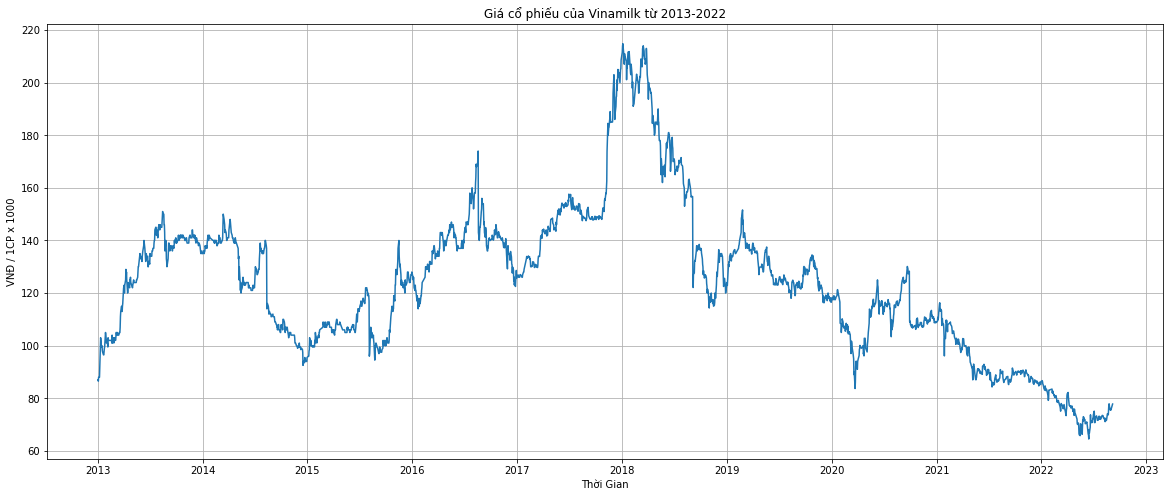

In [10]:
vinamilk  = prices[prices['code']=='VNM'].sort_values('date')
plt.figure(figsize = (20,8))
plt.plot(vinamilk['date'], vinamilk['close'])
plt.xlabel('Thời Gian')
plt.ylabel('VNĐ / 1CP x 1000')
plt.title('Giá cổ phiếu của Vinamilk từ 2013-2022')
plt.grid()
plt.show()

- Dễ dàng thấy giá vnđ/1cp của VNM đạt đỉnh vào đầu năm 2018, bài báo có ý so sánh với 10 năm trước đó là năm 2008, từ biểu đồ thấy trong data này chỉ có sớm nhất là từ năm 2013.
- Vậy hãy tính trong thời gian 2013-2018

In [11]:
#filter date from 2013 - 2018:
df_filter = vinamilk[vinamilk['date'] <= '2018-12-30']
min_filter = df_filter['close'].min()
max_filter = df_filter['close'].max()
print(f'Từ 2013-01-03 đến 2018-01-04 VNM đã tăng {round((max_filter - min_filter)/min_filter*100,2)} %')
print(f'Từ 2008 đến 2018-01-04 VNM đã tăng {round((max_filter - 5)/5*100,2)} %')

Từ 2013-01-03 đến 2018-01-04 VNM đã tăng 148.32 %
Từ 2008 đến 2018-01-04 VNM đã tăng 4196.0 %


- Đặt vấn đề:

- Nếu giá cổ phiếu của VNM hiện tại là 140k/1 cổ vậy nên mua hay bán ??
- Chắc chắn cần nhiều thông tin hơn, mình muốn biết trong quá khứ giá này giữ được bao lâu ? ví dụ trong quá khứ giá 140k - 200k chỉ xuất hiện trong khoảng thời gian rất ngắn chỉ vài ngày, mình sẽ cân nhắc đến việc bán ngay và ngược lại.
- Tất nhiên sẽ phụ thuộc rất nhiều yếu tố , trong phạm vi bài này chỉ đưa ra 1 yếu tố và cố gắng phân tích gãy gọn.

Statistic Function : pandas describe()

In [12]:
# lãi suất theo năm, lãi kép, lạm phát
vinamilk['close'].describe()

count    2412.000000
mean      124.074585
std        28.563111
min        64.500000
25%       105.000000
50%       124.000000
75%       140.000000
max       214.800000
Name: close, dtype: float64

- Giờ hãy tìm hiểu cách tính các chỉ số trên và ý nghĩa của chúng

- count = 2412 có nghĩa là VNM có tất cả 2412 record trong data tương ứng với số ngày niêm yết

- mean, min, max lần lượt là giá trung bình, nhỏ nhất, lớn nhất trong 10 năm

- std: hãy viết hàm tính độ lệch chuẩn và so sánh kết quả với hàm descibe(), khi tự tính được bạn sẽ hiểu được ý nghĩa của các đại lượng :

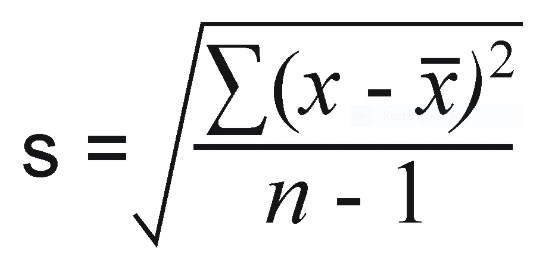

In [13]:
def caculated_std(series):
    squared_distance = (series - series.mean())**2
    sum_dis = squared_distance.sum()
    std_series = np.sqrt(sum_dis/(len(series)-1))
    return std_series

std_vinamilk = caculated_std(vinamilk['close'])
print(f'Độ lệch chuẩn = {std_vinamilk}')

Độ lệch chuẩn = 28.563110591083966


- Tiếp theo giá trị 25%, 50%, 75% chính là tứ phân vị
- link document : https://en.wikipedia.org/wiki/Quartile
- Viết hàm tính tứ phân vị:

In [14]:
def caculated_quartile(series):
    list_temp = series.tolist()
    list_temp.sort()
    n = len(list_temp)
    if  n % 2 != 0 :
        median = list_temp[n//2]
        Q2 = list_temp[n//2]
        Q1 = list_temp[n//4]
        Q3 = list_temp[n//4*3]
    else:
        Q2 = (list_temp[n//2] + list_temp[(n//2)-1])/2
        Q1 = (list_temp[n//4] + list_temp[(n//4)-1])/2
        Q3 = (list_temp[n//4*3] + list_temp[(n//4*3)-1])/2
    return Q1,Q2,Q3
Q1,Q2,Q3 = caculated_quartile(vinamilk['close'])
print(f'tứ phân vị: 25% / 50% / 75%  <=> {Q1} / {Q2} / {Q3}')

tứ phân vị: 25% / 50% / 75%  <=> 105.0 / 124.0 / 140.0


- Sau khi biết cách tính hãy tìm hiểu ý nghĩa của chúng : 
    1. Độ lệch chuẩn đo tính biến động của giá trị mang tính thống kê, std = 28.56 => cổ phiếu VNM biến động khá lớn ( trong trường hợp này là biến động tích cực, tăng 148.32 % từ 2013-2018 như đã tính ở trên )
    2. Q3-75%  = 140 có nghĩa là trong số 2412 ngày niêm yết thì hết 75% số ngày đó giá cổ phiếu < 140k vnđ/1 cổ, tương tự Q2-50% = 124 có nghĩa là 50% số ngày giá cổ phiếu < 124k vnđ/1 cổ v..v

- SUMMARY 2.A

- Quay lại câu hỏi nếu hiện tại giá đóng cửa VNM là 140k/1 cổ thì nên mua hay bán ? 
- Mình cũng ko biết, còn phụ thuộc nhiều yếu tố nữa, đến đây chỉ biết 1 điều chắc chắn rằng trong quá khứ theo tỉ lệ thì cứ 4 ngày lên sàn thì có 3 ngày giá VNM thấp hơn 140k.
- Vì thế cần áp dụng thêm các công cụ thống kê khác bạn sẽ hiểu thêm cả về data lẫn công thức xác suất thống kê, hãy trả lời câu hỏi sau: 

- Đặt vấn đề:

- Tính được tứ phân vị rồi nhưng các khoảng 25%, 50%, 75% vẫn là quá rộng vì thế sếp của bạn yêu cầu rằng: tôi muốn chia khoảng giá từ min-max thành 10, hoặc 15 khoảng nhỏ và tần suất (số lần xuất hiện) của mỗi khoảng nhỏ đó là bao nhiêu ??
- Biểu đồ histogram sẽ trả lời cho câu hỏi đó:

Text(0.5, 1.0, 'Biểu đồ tần suất histogram giá đóng cửa của VNM ')

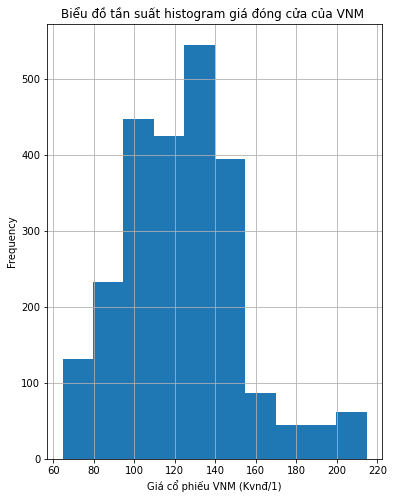

In [15]:
plt.figure(figsize = (6,8))
plt.hist(vinamilk['close'])
plt.xlabel('Giá cổ phiếu VNM (Kvnđ/1)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Biểu đồ tần suất histogram giá đóng cửa của VNM ')

- Bên trong hàm plt.hist() đã hoạt động thế nào ?
- Đơn giản là nó chia khoảng min-max thành n khoảng bằng nhau, n có thể thay đổi tùy ý nhưng default  = 10
- Sau đó thực hiện count các giá trị thuộc những khoảng nhỏ đó.
- Nói cách khác là bên trong plt.hist() đã thực hiện hàm thống kê sau:

In [16]:
vinamilk['close'].value_counts(bins = 10).sort_index()

(64.34899999999999, 79.53]    131
(79.53, 94.56]                233
(94.56, 109.59]               447
(109.59, 124.62]              425
(124.62, 139.65]              545
(139.65, 154.68]              394
(154.68, 169.71]               87
(169.71, 184.74]               44
(184.74, 199.77]               44
(199.77, 214.8]                62
Name: close, dtype: int64

- Có nghĩa là:
        - khoảng giá: 64.34 - 79.53 vnđ/1 có tần suất = 131 lần
        - v...v..
        - khoảng giá: 139.65 - 154.68 vnđ/1 có tần suất = 394 lần
        - khoảng giá: 199.77 - 214.8 vnđ/1 có tần suất = 62 lần

- Sau khi biết cách tính hãy plot lại nhưng chia thành 20 khoảng nhỏ và cho thêm dải màu thay đổi theo giá trị.

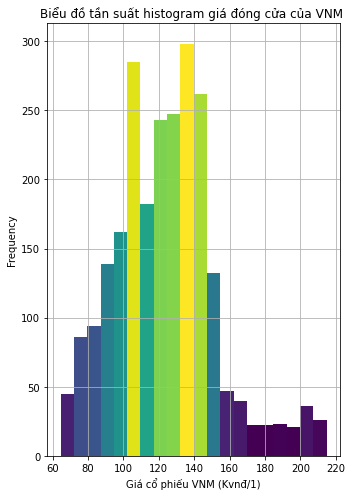

[ 45.  86.  94. 139. 162. 285. 182. 243. 247. 298. 262. 132.  47.  40.
  22.  22.  23.  21.  36.  26.]
[ 64.5    72.015  79.53   87.045  94.56  102.075 109.59  117.105 124.62
 132.135 139.65  147.165 154.68  162.195 169.71  177.225 184.74  192.255
 199.77  207.285 214.8  ]


In [17]:
from matplotlib import colors

fig, ax = plt.subplots(tight_layout=True,figsize = (5,7))
y_value, x_value, patches = ax.hist(vinamilk['close'], bins=20)

fracs = y_value / y_value.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)  
plt.grid()
plt.xlabel('Giá cổ phiếu VNM (Kvnđ/1)')
plt.ylabel('Frequency')
plt.title('Biểu đồ tần suất histogram giá đóng cửa của VNM ')
plt.show()
print(y_value)
print(x_value)

- Mong rằng qua những con số thống kê trên đã giúp cho bạn phần nào trả lời câu hỏi số 2.

- Dưới đây là biểu đồ mối quan hệ giữa khối lượng giao dịch - Volume và giá đóng cửa 'close' của cp Vinamilk theo thời gian:
- Đường màu xanh là khối lượng giao dịch, màu tím là giá đóng cửa, bạn có thấy gì đặc biệt không ?

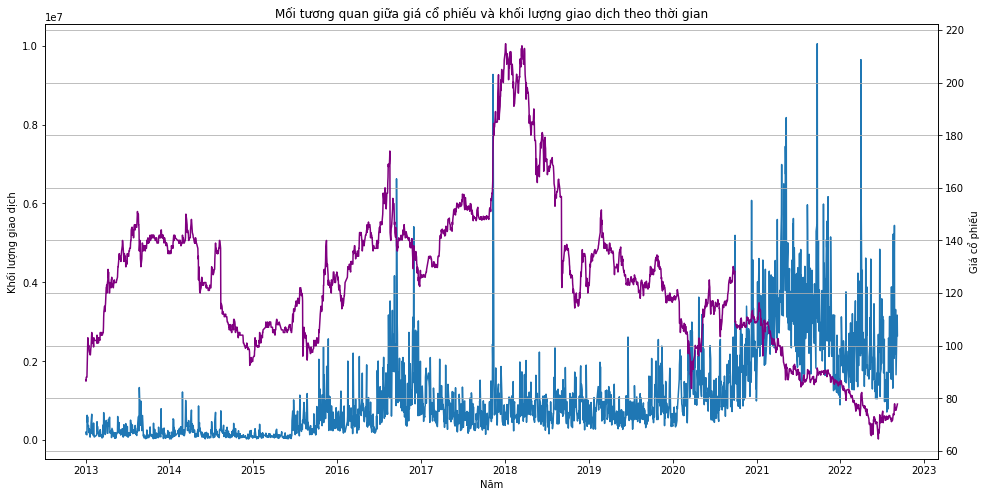

In [18]:
fig, ax1 = plt.subplots(figsize = (16,8))
ax1.plot(vinamilk['date'],vinamilk['nmVolume'])
plt.xlabel('Năm')
plt.ylabel('Khối lượng giao dịch')
ax2 = ax1.twinx()
ax2.plot(vinamilk['date'],vinamilk['close'], color = 'purple')
plt.ylabel('Giá cổ phiếu')
plt.grid()
plt.title('Mối tương quan giữa giá cổ phiếu và khối lượng giao dịch theo thời gian')
plt.show()

In [20]:
vinamilk['year'] = vinamilk['date'].dt.year
group_year = vinamilk.groupby('year').sum()
group_year

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
year,,,,,,,,,,,,,,,,,,,,
2013,32068.5,34148.0,29953.5,32095.5,32408.5,31802.5,32116.5,5.250003e+10,9016.346,9104.046,8934.050,9022.024,1.859092e+10,56629040.0,7.216901e+12,0.0,0.000000e+00,48.0,13.2315,46.3434
2014,30285.5,32219.5,28252.0,30275.5,30545.5,30011.0,30245.5,3.024799e+04,9407.399,9490.881,9325.058,9397.506,9.398261e+03,46954170.0,6.011602e+12,0.0,0.000000e+00,-40.0,-14.3077,-31.9726
2015,27219.5,29014.0,25419.6,27198.0,27533.0,26938.5,27251.0,2.721964e+04,10781.880,10918.118,10677.027,10802.837,1.079094e+04,88245570.0,1.013236e+13,0.0,0.000000e+00,31.5,12.1563,33.4050
2016,34812.8,37161.5,32453.1,34867.2,35206.9,34507.1,34844.4,3.483723e+04,17141.355,17306.332,16963.719,17127.808,1.712509e+04,271713870.0,3.826380e+13,0.0,0.000000e+00,31.6,12.5828,22.3648
2017,37703.0,40330.3,35075.7,37876.2,38199.8,37675.4,37979.1,3.795691e+04,21487.553,21671.672,21373.433,21546.257,2.153361e+04,199255340.0,3.058766e+13,0.0,0.000000e+00,87.1,49.6070,55.2871
2018,40550.4,43377.4,37723.2,40988.4,41390.8,40551.9,40958.5,4.097295e+04,25123.408,25370.861,24857.104,25107.599,2.511579e+04,208621330.0,3.420313e+13,0.0,0.000000e+00,-60.3,-36.0053,-31.6034
2019,32067.5,34299.8,29835.2,32209.4,32440.2,31955.6,32188.5,3.219355e+04,23283.474,23450.228,23100.029,23268.240,2.327192e+04,205869670.0,2.653987e+13,0.0,0.000000e+00,-3.0,-2.2415,-0.7285
2020,27845.0,29781.6,25908.3,27846.8,28129.1,27584.5,27861.8,2.785132e+04,22000.955,22219.714,21796.341,22011.267,2.200331e+04,380012160.0,4.159872e+13,0.0,0.000000e+00,16.8,13.1945,18.6018
2021,23339.7,24961.5,21717.9,23361.2,23557.1,23144.9,23322.7,2.333887e+04,21847.384,22030.239,21645.825,21811.539,2.182670e+04,823541300.0,7.695380e+13,0.0,0.000000e+00,-17.0,-15.7187,-14.4431


In [21]:
group_year['ratio_volume(%)'] = group_year['nmVolume'] / group_year['nmVolume'].sum() * 100
group_year.loc[:,['ratio_volume(%)']]

,ratio_volume(%)
year,
2013,2.121972
2014,1.759440
2015,3.306689
2016,10.181511
2017,7.466385
2018,7.817342
2019,7.714234
2020,14.239604
2021,30.859281


- Hãy visualize khối lượng giao dịch theo năm cổ phiếu VNM:

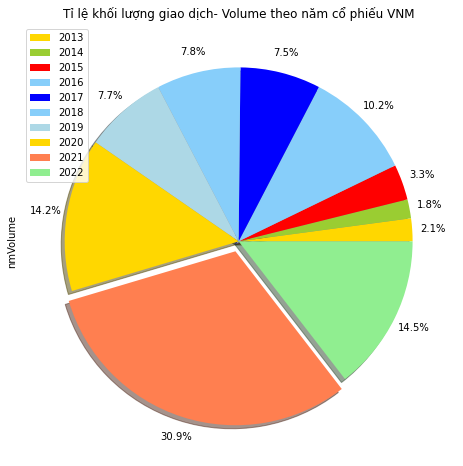

In [22]:
import matplotlib.pyplot as plt
color_list = ['gold','yellowgreen','red','lightskyblue','blue','lightskyblue','lightblue','gold','coral','lightgreen','pink']
explore_list = [0,0,0,0,0,0,0,0,0.06,0]
group_year['nmVolume'].plot(kind='pie',
                           figsize=(8,8), 
                           autopct='%1.1f%%',
                           startangle=0,
                           shadow= True,
                          pctdistance=1.12,
                           colors = color_list,
                           explode = explore_list,
                          labels = None)

plt.legend(labels = group_year.index, loc='upper left')
plt.title('Tỉ lệ khối lượng giao dịch- Volume theo năm cổ phiếu VNM')
plt.show()

- Chỉ riêng năm 2021 khối lượng giao dịch cp VNM đã chiếm 30% tổng số lượng giao dịch trong 10 năm.
- Trái ngược với khối lượng giao dịch rất lớn giá cổ phiếu VNM lao dốc trong thời gian này

- Những chỉ số này nói lên điều gì ?!?

- Năm 2021 là năm VN trải qua cuộc khủng hoảng đại dịch covid-19, sản xuất, phân phối đều bị đình trệ vì thế dễ hiểu khi giá cổ phiếu của Vinamilk lao dốc lịch sử còn 64.5k/1 là giá thấp nhất từ 2013-nay.
- Trái ngược với tình hình đó thì khối lượng giao dịch cổ phiếu lại tăng theo cấp số nhân là vì đâu ?
- Có phải do cổ phiếu VNM quá hấp dẫn đến mức thu hút các nhà đầu tư nhiều đến như vậy, câu trả lời là có thể nhưng không đủ, hãy lun nhớ rằng giá VNM đạt đỉnh là năm 2018- năm đó và 2 năm sau đó khối lượng giao dịch đều không nhiều và đột biến như năm 2021
- Kết luận: sự đột biến của năm 2021 còn ở 1 nguyên nhân khác !

- Bây giờ hãy thử visualize khối lượng giao dịch theo năm nhưng không phải chỉ của 1 mình vinamilk nữa mà của tất cả các công ty trên sàn chứng khoán :

In [23]:
prices['year'] = prices['date'].dt.year
group_total = prices.groupby('year').sum()
group_total

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
year,,,,,,,,,,,,,,,,,,,,
2013,2.685478e+06,2.936027e+06,2.433695e+06,2.684153e+06,2.713389e+06,2.658643e+06,2.690508e+06,1.277455e+11,1.344740e+06,1359457.236,1331847.928,1.347864e+06,7.285612e+10,2.489998e+10,2.959740e+14,3.300625e+08,6.379252e+12,2671.916713,854.1476,41030.8572
2014,3.254487e+06,3.544688e+06,2.963360e+06,3.251198e+06,3.293203e+06,3.213260e+06,3.258983e+06,3.152302e+06,1.710454e+06,1732819.852,1690035.304,1.714354e+06,1.657930e+06,4.481371e+10,6.572880e+14,1.630795e+09,2.948734e+13,3013.664000,1360.3545,39514.0725
2015,3.598121e+06,3.929891e+06,3.264939e+06,3.593138e+06,3.634964e+06,3.557298e+06,3.601043e+06,3.436921e+10,2.031875e+06,2055401.690,2011236.588,2.035932e+06,1.899609e+10,3.611273e+10,5.416196e+14,3.063931e+09,4.896502e+13,2128.921000,835.1786,24228.4658
2016,4.582138e+06,5.064726e+06,4.098735e+06,4.577521e+06,4.632796e+06,4.527976e+06,4.587393e+06,4.467156e+06,2.785668e+06,2818680.946,2755830.174,2.791541e+06,2.712315e+06,3.980903e+10,6.306435e+14,4.516440e+09,7.310345e+13,5211.549000,2634.9707,34387.2050
2017,6.025151e+06,6.761221e+06,5.288813e+06,6.048317e+06,6.110695e+06,5.989236e+06,6.056945e+06,5.910318e+06,4.060521e+06,4102010.708,4021281.037,4.066379e+06,3.963742e+06,5.738770e+10,1.040136e+15,5.185242e+09,1.196312e+14,5696.551150,3494.9938,49377.1484
2018,6.636823e+06,7.510013e+06,5.763359e+06,6.727090e+06,6.795355e+06,6.660370e+06,6.735815e+06,6.593870e+06,4.946103e+06,4994432.733,4898698.735,4.952269e+06,4.843325e+06,5.743433e+10,1.301390e+15,7.357913e+09,1.976754e+14,2220.920000,1292.6820,36308.6826
2019,6.915227e+06,7.870189e+06,5.960061e+06,6.938765e+06,6.993563e+06,6.886851e+06,6.948630e+06,6.767811e+06,5.543004e+06,5585734.822,5502671.711,5.551502e+06,5.401152e+06,4.414226e+10,8.640028e+14,8.517945e+09,1.849593e+14,3352.270000,2307.3357,46567.6365
2020,6.855591e+06,7.835593e+06,5.875386e+06,6.853208e+06,6.916594e+06,6.794914e+06,6.873392e+06,6.736735e+06,5.836308e+06,5888609.907,5788000.217,5.854548e+06,5.734252e+06,9.431064e+10,1.544788e+15,9.338858e+09,1.894742e+14,7186.354840,5495.9520,82267.2667
2021,9.014595e+06,1.016530e+07,7.863552e+06,9.020511e+06,9.139369e+06,8.904583e+06,9.054568e+06,8.864348e+06,8.184882e+06,8278969.911,8068714.358,8.204899e+06,8.025944e+06,2.320703e+11,6.123358e+15,1.035513e+10,2.856473e+14,20723.996610,18389.9242,159553.6949


Khối lượng giao dịch là tổng số cổ phiếu được khớp lệnh trong từng phiên làm việc


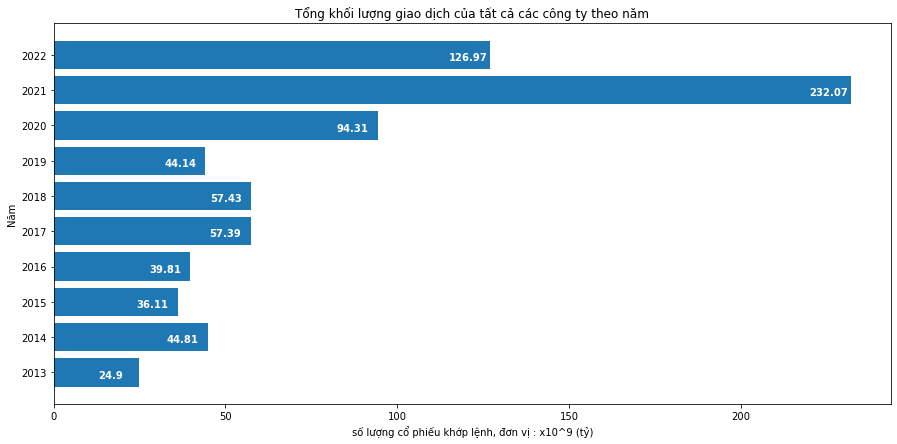

In [24]:
print('Khối lượng giao dịch là tổng số cổ phiếu được khớp lệnh trong từng phiên làm việc')
volume_total = group_total['nmVolume']
x = list(map(str, volume_total.index))
width = 0.8
fig = plt.figure(figsize = (15, 7))
plt.barh(x,round(group_total['nmVolume']/(10**9),2),width)
plt.title('Tổng khối lượng giao dịch của tất cả các công ty theo năm')
plt.xlabel('số lượng cổ phiếu khớp lệnh, đơn vị : x10^9 (tỷ)')
plt.ylabel('Năm')
for i, v in enumerate(round(volume_total/(10**9),2)):
    plt.text(v-12, i-0.15, str(v),color = 'white',fontsize=10,fontweight = 'bold')
plt.show()

- Đến đây ta có thể kết luận được rằng khối lượng giao dịch tăng đột biến năm 2021 đến từ toàn thị trường chứ không chỉ mã VNM.
- Điều này giúp ta nhận ra rằng:
    - Mặc cho giá cổ phiếu của nhiều cty lao dốc thì số giao dịch được khớp lệnh tăng đột biến trong thời kỳ này, và cũng ghi nhận là năm có số lượng nhà đầu tư mới tham gia nhiều nhất!
    - Phản ánh đúng tình trạng thời covid đó là: Không thể di chuyển tự do khiến cho những kênh đầu tư truyền thống bị hạn chết rất nhiều, nhường chỗ vào đó là sự quan tâm đến các kênh đầu từ online, và chứng khoán là 1 trong số đó !

CÂU 3:

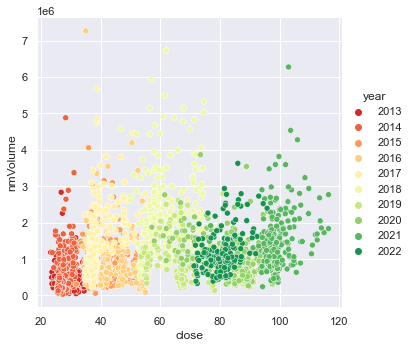

In [25]:
df_VCB = prices[prices['code'] == 'VCB'].copy()
df_VCB.loc[:,['year']] = df_VCB.loc[:,['year']] .astype('str')
import seaborn as sns
sns.set_theme()
sns.relplot(data=df_VCB, x='close', y='nmVolume',hue='year', palette='RdYlGn')
plt.show()

# Phần 2 : Machine learning: dự đoán giá cổ phiếu

- Với data này hầu như là biến liên tục trừ 4 cột: date, time, floor, type, cả 4 cột này cũng ko có nhìu ý nghĩa phân loại.
- => Bước đầu chỉ sử dụng được các thuật toán của bài toán hồi quy, bài toán phân loại là không phù hợp!

Lên ý tưởng:
- LAYOUT:
    - 1. Transfrom data: 
        - phần này chủ yếu là clean data đưa về đúng chuẩn, tranform data: xử lý chuỗi v..v, astype() v.v.v
        - Xử lý những record null, tranform data: dropna, fillna v..v
        - Data trong bài này crawl bằng API toàn bộ là data sạch => bỏ qua bước transform.
    - 2. Selection Features:
        - RFE (Recursive Feature Elimination )
        - Correlative: plot matrix correlative by heatmap 
        - Variance    

In [29]:
fea_categoty = ['year','time','date','code','type']
prices['type'].unique()

array(['STOCK', 'IFC', 'ETF'], dtype=object)

In [30]:

X

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,...,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,year
0,9.30,10.2,8.4,9.3,9.3,9.3,9.3,9.300000,6.742,6.742,...,6.742,6.742000,0.0,0.000000e+00,0.0,0.0,0.00,0.0000,0.0000,2013
1,4.60,5.0,4.2,4.4,4.7,4.4,4.7,4.700000,4.154,4.437,...,4.437,4.437000,34500.0,1.585800e+08,0.0,0.0,0.10,0.0944,2.1739,2013
2,14.20,15.6,12.8,14.0,14.7,14.0,14.7,14.700000,14.000,14.700,...,14.700,14.700000,1100.0,1.547000e+07,0.0,0.0,0.50,0.5000,3.5211,2013
3,22.00,23.5,20.5,22.0,22.0,22.0,22.0,0.000000,9.992,9.992,...,9.992,0.000000,0.0,0.000000e+00,0.0,0.0,0.00,0.0000,0.0000,2013
4,3.40,3.6,3.2,3.2,3.2,3.2,3.2,3.200000,3.200,3.200,...,3.200,3.200000,200.0,6.400000e+05,0.0,0.0,-0.20,-0.2000,-5.8824,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075263,9.90,11.3,8.5,10.0,10.3,10.0,10.1,10.124619,10.000,10.300,...,10.100,10.124619,407003.0,4.070030e+05,0.0,0.0,0.20,0.2000,2.0202,2022
3075264,21.70,24.9,18.5,21.3,21.7,21.0,21.7,21.188889,21.300,21.700,...,21.700,21.188889,4500.0,4.500000e+03,0.0,0.0,0.00,0.0000,0.0000,2022
3075265,15.45,16.5,14.4,15.5,15.7,15.4,15.5,15.555641,15.500,15.700,...,15.500,15.555641,9125500.0,1.419530e+11,296000.0,45732.0,0.05,0.0500,0.3236,2022
3075266,6.10,7.0,5.2,6.1,6.1,6.1,6.1,0.000000,6.100,6.100,...,6.100,0.000000,0.0,0.000000e+00,0.0,0.0,0.00,0.0000,0.0000,2022


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
lr = LinearRegression()
X = prices.select_dtypes(include = ['float','int']).drop('close', axis = 1).copy()
y = prices['close'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 10)

In [52]:
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
score = r2_score(y_predict,y_test)
print(score*100,'%')

97.18773966218554 %


In [55]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_predict,y_test)
rmse = np.sqrt(mse)
rmse

3.665794182221572

# phân nhóm các công ty còn niềm yết dựa trên thuật toán ko giám sát cluster Kmeans

- transfrom data:

In [86]:
prices = pd.read_csv('vndirect.csv')
prices['date'] = pd.to_datetime(prices['date'])
prices['year'] = prices['date'].dt.year

In [121]:
data = prices[prices['year']==2022]
data = prices.groupby('code').mean()
data.reset_index(inplace = True)
data

,code,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,year
0,A32,29.828025,34.449018,25.207032,29.863392,29.994312,29.763599,29.881179,29.873428,25.108723,...,25.126458,25.118135,4.867435e+02,1.472642e+07,0.620476,1.656670e+04,0.020062,0.018198,0.173670,2020.241986
1,AAA,18.107993,19.552638,16.663128,18.157042,18.456381,17.878949,18.156228,18.159873,11.229408,...,11.225582,11.234342,1.964621e+06,3.433549e+10,39342.050270,8.821121e+08,0.008184,0.002910,0.074163,2017.353552
2,AAM,12.766725,13.618810,11.898839,12.739755,12.956571,12.537023,12.786687,11.838154,8.946381,...,8.977468,8.350850,6.602678e+03,8.842652e+07,2907.781924,3.800479e+07,-0.003379,-0.001078,0.027266,2017.350746
3,AAS,17.271375,19.822787,14.719962,17.503390,17.969492,16.726554,17.307345,17.283744,17.503390,...,17.307345,17.283744,1.081575e+06,1.494456e+10,21723.291902,4.193542e+08,0.035970,0.035970,0.485467,2021.096045
4,AAT,16.388571,17.515467,15.260797,16.340220,16.667885,15.944835,16.400934,16.266055,14.864181,...,14.918418,14.795071,8.043555e+05,1.325051e+10,1098.901099,1.428571e+07,0.012363,0.007259,0.114632,2021.456044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,YBC,14.421261,17.687093,11.155430,14.497452,14.534712,14.469507,14.512698,14.487733,14.497452,...,14.512698,14.487733,2.148302e+03,2.173919e+07,399.918129,2.260457e+06,0.053175,0.053175,1.212927,2017.379282
1873,YBM,8.739288,9.341157,8.134362,8.749258,8.912948,8.526499,8.750752,8.693036,6.922832,...,6.922699,6.877562,7.191079e+04,9.205797e+08,0.000000,0.000000e+00,-0.003769,-0.002478,0.024675,2020.144411
1874,YEG,75.845814,81.150761,70.538487,76.408325,77.682683,74.962797,76.408896,76.270486,76.408325,...,76.408896,76.270486,1.452941e+05,4.824717e+09,47512.791627,3.835964e+09,-0.217127,-0.217127,-0.167770,2020.062797
1875,YRC,8.682091,11.788898,5.575284,8.721070,8.721070,8.721070,8.721070,8.721070,7.009187,...,7.009187,7.009187,2.317666e+01,3.179984e+05,0.000000,0.000000e+00,-0.000567,-0.000554,0.009761,2018.644246


In [96]:
data.shape

(1877, 22)

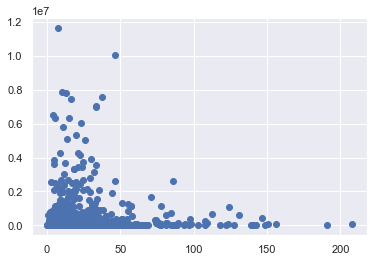

In [122]:
plt.scatter(data['close'],data['nmVolume'])

In [123]:
from sklearn.cluster import KMeans
X = data.loc[:,['close','nmVolume']].copy()
kmeans = KMeans(n_clusters=5, random_state=100).fit(X)
print(kmeans.labels_)

[0 2 0 ... 0 0 0]


In [124]:
data['cluster'] = kmeans.labels_
data.loc[:,['code','cluster','close','nmVolume']]

,code,cluster,close,nmVolume
0,A32,0,29.881179,4.867435e+02
1,AAA,2,18.156228,1.964621e+06
2,AAM,0,12.786687,6.602678e+03
3,AAS,4,17.307345,1.081575e+06
4,AAT,4,16.400934,8.043555e+05
...,...,...,...,...
1872,YBC,0,14.512698,2.148302e+03
1873,YBM,0,8.750752,7.191079e+04
1874,YEG,0,76.408896,1.452941e+05
1875,YRC,0,8.721070,2.317666e+01


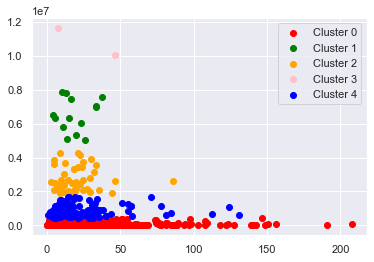

In [125]:
colors = ['red', 'green','orange','pink','blue']
labels = np.unique(kmeans.labels_)
for i in range(len(labels)):
    filter_df = data[data['cluster']==labels[i]].copy()
    plt.scatter(filter_df['close'],filter_df['nmVolume'], color = colors[i])
plt.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
plt.show()

In [104]:
data[data['code']=='BID']

,code,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,year,cluster
119,BID,29.108877,31.113048,27.101887,29.171062,29.627819,28.763816,29.188979,29.191401,22.477488,...,22.49414,1.939448e+06,5.839445e+10,34990.44082,1.102209e+09,0.014376,0.011483,0.071968,2017.882572,2


# MACHINE LEARNING

## Bố Cục:



### 1. Selection Futures:
- Mục đích chính của phần 'selection futures' là chọn ra những tính năng có lợi cho model và loại bỏ những tính năng không giúp ích từ đó làm tăng độ chính xác và tăng performance cho models.

- Các phương pháp trong phần này có thể kể đến như:
    - Tính toán mối tương quan dataframe.corr() và đặt 1 giá trị ngưỡng để lọc
    - Loại bỏ những features trùng lặp lẫn nhau (mặc dù có tương quan với target nhưng thừa vì đã có features khác giống hệt như vậy)
    - Loại bỏ features có phương sai rất thấp - bởi vì feature như vậy chứa tất cả dữ liệu gần như là bằng nhau hết, bất biến thì cũng không giúp đc gì cho model
    - RFE - recursive feature elimination (loại bỏ tính năng đệ quy) 
    
### 2. Choice and train models
- LinearRegression
- Decision Tree with Regression

In [161]:
features_object = ['code','date','time','floor','type']
df_numeric = prices.select_dtypes(include = ['float','int'])
df_numeric.head()

,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,9.3,10.2,8.4,9.3,9.3,9.3,9.3,9.3,6.742,6.742,6.742,6.742,6.742,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
1,4.6,5.0,4.2,4.4,4.7,4.4,4.7,4.7,4.154,4.437,4.154,4.437,4.437,34500.0,158580000.0,0.0,0.0,0.1,0.0944,2.1739
2,14.2,15.6,12.8,14.0,14.7,14.0,14.7,14.7,14.000,14.700,14.000,14.700,14.700,1100.0,15470000.0,0.0,0.0,0.5,0.5000,3.5211
3,22.0,23.5,20.5,22.0,22.0,22.0,22.0,0.0,9.992,9.992,9.992,9.992,0.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
4,3.4,3.6,3.2,3.2,3.2,3.2,3.2,3.2,3.200,3.200,3.200,3.200,3.200,200.0,640000.0,0.0,0.0,-0.2,-0.2000,-5.8824


- Đo mối tương quan của tất cả column numeric đối với column target : 'close':

In [162]:
measure_corr = df_numeric.corr()['close']
measure_corr

basicPrice      0.996577
ceilingPrice    0.992890
floorPrice      0.991199
open            0.999059
high            0.999338
low             0.999240
close           1.000000
average         0.001949
adOpen          0.849572
adHigh          0.916159
adLow           0.915646
adClose         0.916584
adAverage       0.001478
nmVolume        0.028592
nmValue         0.157405
ptVolume        0.010153
ptValue         0.039997
change          0.044944
adChange        0.037857
pctChange       0.008586
Name: close, dtype: float64

- Chỉ giữ lại những lại những features có độ tương quan > 0.3 đối với column 'close'

In [163]:
strong_corr = measure_corr[abs(measure_corr)>0.3].drop('close').index
strong_corr

Index(['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low',
       'adOpen', 'adHigh', 'adLow', 'adClose'],
      dtype='object')

- Visualize tất cả features đã lọc ra ở trên:

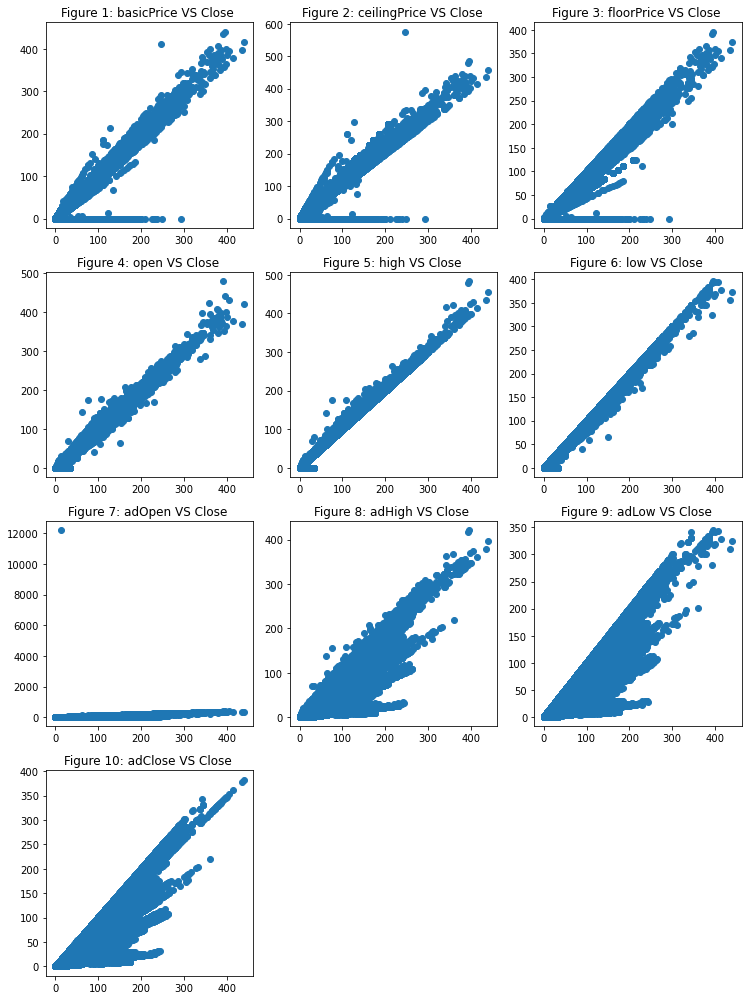

In [158]:
n_rows = 4
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r *n_cols + c
        if i < len(strong_corr):
            ax_i = ax[r,c]          
            ax_i.scatter(df_numeric['close'], df_numeric[strong_corr[i]])
            ax_i.set_title(f"Figure {i+1}: {strong_corr[i]} VS Close ")
ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)   
plt.tight_layout()
plt.show()

- Độ tương quan giữa column 'close' và column 'adOpen' là 0.849572 => tương quan khá cao
- Nhưng nhìn vào hình 7 không đúng lắm, khi trục x là giá đóng cửa tăng thì trục y vẫn không tăng

In [164]:
df_temp  =  df_numeric[df_numeric['adOpen'] < 2000].copy()
df_temp.shape

(3075267, 20)

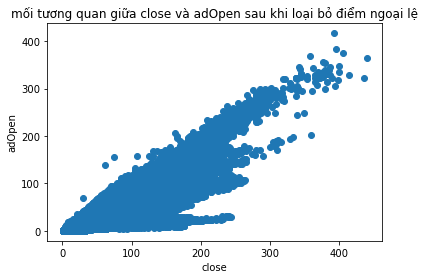

In [165]:
plt.scatter(df_temp['close'],df_temp['adOpen'])
plt.title("mối tương quan giữa close và adOpen sau khi loại bỏ điểm ngoại lệ")
plt.xlabel("close")
plt.ylabel("adOpen")
plt.show()

- Lý do hình 7 nhìn có vẻ như close và adOpen không tương quan là do điểm ngoại lệ đã làm range giữa các điểm trở nên rất xa nhau, cho nên khi trực quan ko thấy đc mức độ tương quan => vẫn giữ lại 'adOpen' 

<AxesSubplot:>

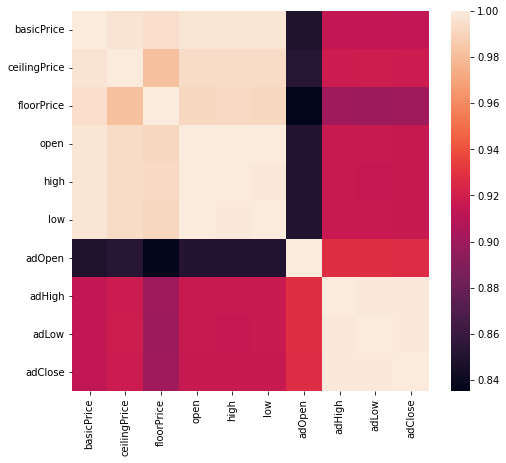

In [166]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (8,7))
sns.heatmap(df_numeric[strong_corr].corr())

<AxesSubplot:>

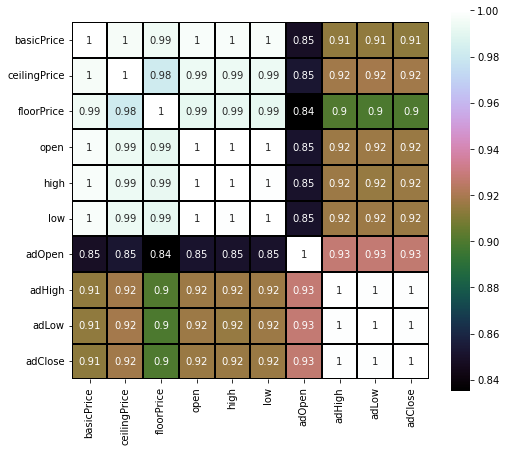

In [167]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (8,7))
sns.heatmap(df_numeric[strong_corr].corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

- Từ heatmap và ma trận tương quan ở trên thì hoàn toàn có thể bỏ đi 1 số tính năng trùng lặp:
    - Trong 6 cái: open, hight, low, basicPrice, ceilingPrice, floorPrice chỉ cần giữ lại 3 features(ở đây mình giữ lại open, hight, low)
    - Mình sẽ thực hiện train model và tính mse trong 2 trường hợp: 1 là khi còn đủ features và 2 là khi bỏ bớt các features trùng lặp để chứng tỏ rằng bỏ bớt features trùng lặp sẽ ko ảnh hưởng đến kết quả dự đoán, trái lại còn làm tăng performance

# #TH1: Khi giữ đủ các corr_features :
['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low','adOpen', 'adHigh', 'adLow', 'adClose']

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

corr_features = strong_corr.tolist()
print(f"corr_features: {full_features}")

X = df_numeric.loc[:,corr_features].copy()
y = df_numeric['close'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
mse = mean_squared_error(y_predict, y_test)
score = r2_score(y_test, y_predict)
print(f'score = {score*100} %')
print(f"MSE khi giữ đủ các corr_features = {mse}")

corr_features: ['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low', 'adOpen', 'adHigh', 'adLow', 'adClose']
score = 99.99646424690982 %
MSE khi giữ đủ các corr_features = 0.016457042296249266


# #TH2: Lọc bớt features trùng lặp:
features_filter = ['basicPrice','adOpen', 'adHigh', 'adLow', 'adClose']

In [189]:
features_filter = ['high', 'low','open','adOpen', 'adHigh', 'adLow', 'adClose']
print(f"features_filter: {features_filter}")

X = df_numeric.loc[:,features_filter].copy()
y = df_numeric['close'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
score = r2_score(y_test, y_predict)
print(f'score = {score*100}%')
mse = mean_squared_error(y_predict, y_test)
print(f"MSE khi lọc bớt các features trùng lặp = {mse}")

features_filter: ['high', 'low', 'open', 'adOpen', 'adHigh', 'adLow', 'adClose']
score = 99.99636398457884%
MSE khi lọc bớt các features trùng lặp = 0.01692370989993353


- Sau khi bỏ bớt đi 3 features ta có score = 99.9963% so với score = 99.9964% chênh rất nhỏ
- Điều này sẽ giúp tăng performance của models lên.
- Tiếp theo kiểm tra phương sai của các features lọc ra ở trên:

In [196]:
df_numeric.loc[:,features_filter].var()

high       477.642110
low        455.902209
open       466.519115
adOpen     347.122407
adHigh     305.607871
adLow      292.273009
adClose    299.194547
dtype: float64

- Từ kết quả trên thấy rằng cả 7 features trên đều có phương sai lớn, như vậy ko cần loại bỏ features nào cả

## Summary 1:
- Xong 3 phương pháp selection features: 
    - Lọc bằng hàm tương quan với ngưỡng > 0.3
    - Loại bỏ features trùng lặp
    - Kiểm tra phương sai 

## RFE - Loại bỏ tính năng bằng đệ quy
- Phương pháp cuối cùng trong phần selection features là RFE, để so sánh kết quả với 3 phương pháp ở trên mình sẽ làm lại từ đầu với RFE
- Về cơ bản, trước tiên thuật toán sẽ điều chỉnh mô hình của mình bằng cách sử dụng tất cả các tính năng, sau đó dần dần loại bỏ các tính năng ít quan trọng nhất sau mỗi lần điều chỉnh lại , cho đến còn lại số lượng tính năng mong muốn, được đặt bởi tham số n_features_to_select.

In [177]:
#import thư viện RFE
from sklearn.feature_selection import RFE
X = df_numeric.drop('close', axis = 1).copy()
y = df_numeric['close'].copy()
#Khởi tạo và train 1 models bất kì trước khi đưa vào RFE
lr = LinearRegression()
lr.fit(X, y)
# Đưa model bên trên vào làm tham số và thực hiện loại bỏ features bằng đệ quy:
selector = RFE(lr, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
# Trả về 1 mảng True, False tương ứng với các features input
selector.support_

array([False, False, False, False,  True,  True, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
       False])

In [178]:
selector.ranking_

array([ 5,  8,  7,  4,  1,  1, 13,  9,  1,  1,  1, 12, 10, 14, 11, 15,  3,
        2,  6])

In [179]:
features_RFE = X.columns[selector.support_]
features_RFE

Index(['high', 'low', 'adHigh', 'adLow', 'adClose'], dtype='object')

- Bằng việc sử dụng RFE ta đã có 5 features hữu ích nhất,features_RFE = ['high', 'low', 'adHigh', 'adLow', 'adClose']

In [197]:
from sklearn.metrics import r2_score
features_RFE = features_RFE.tolist()
print(f"features_RFE: {features_RFE}")
X = df_numeric.loc[:,features_RFE].copy()
y = df_numeric['close'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
score = r2_score(y_test, y_predict)
print(f'score = {score*100}%')
mse = mean_squared_error(y_predict, y_test)
print(f"Sử dụng RFE giờ chỉ còn 5 features có MSE = {mse}")

features_RFE: ['high', 'low', 'adHigh', 'adLow', 'adClose']
score = 99.99599572608159%
Sử dụng RFE giờ chỉ còn 5 features có MSE = 0.01863775652888131


## Kết Luận
- Sau khi lọc tương quan: 
    - 10 features: ['basicPrice', 'ceilingPrice', 'floorPrice', 'open', 'high', 'low', 'adOpen', 'adHigh', 'adLow', 'adClose']
    - score = 99.9964 %
    - MSE = 0.0164
- Sau khi lọc trùng lặp:
    - 7 features_filter: ['high', 'low', 'open', 'adOpen', 'adHigh', 'adLow', 'adClose']
    - score = 99.9963 %
    - MSE = 0.0169
- Với RFE (loại bỏ features bằng đệ quy) => kết quả:
    - 5 features :['high', 'low', 'adHigh', 'adLow', 'adClose'] 
    - score = 99.995%
    - mse = 0.0186

### DecisionTreeRegressor

In [236]:
# Dùng DecisionTreeRegressor:
from sklearn.tree import DecisionTreeRegressor
X = df_numeric.loc[:,features_RFE].copy()
y = df_numeric['close'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = DecisionTreeRegressor(max_depth=5, random_state=5678)
model = regr.fit(X_train, y_train)

In [237]:
y_pre_test = regr.predict(X_test)
y_pre_test

array([ 27.81511099,  42.10744009,  16.83356308, ...,  34.37376076,
         9.76697954, 111.8559059 ])

In [238]:
score = r2_score(y_test, y_pre_test)
score

0.9961901533480195

In [239]:
mean_squared_error(y_test, y_pre_test)

1.7732801441355854

## Plot tree

In [240]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 44.98
|   |--- feature_0 <= 18.45
|   |   |--- feature_0 <= 8.80
|   |   |   |--- feature_0 <= 4.80
|   |   |   |   |--- feature_4 <= 2.30
|   |   |   |   |   |--- value: [1.56]
|   |   |   |   |--- feature_4 >  2.30
|   |   |   |   |   |--- value: [3.69]
|   |   |   |--- feature_0 >  4.80
|   |   |   |   |--- feature_0 <= 6.79
|   |   |   |   |   |--- value: [5.70]
|   |   |   |   |--- feature_0 >  6.79
|   |   |   |   |   |--- value: [7.66]
|   |   |--- feature_0 >  8.80
|   |   |   |--- feature_0 <= 13.16
|   |   |   |   |--- feature_0 <= 10.98
|   |   |   |   |   |--- value: [9.77]
|   |   |   |   |--- feature_0 >  10.98
|   |   |   |   |   |--- value: [11.91]
|   |   |   |--- feature_0 >  13.16
|   |   |   |   |--- feature_0 <= 15.65
|   |   |   |   |   |--- value: [14.23]
|   |   |   |   |--- feature_0 >  15.65
|   |   |   |   |   |--- value: [16.83]
|   |--- feature_0 >  18.45
|   |   |--- feature_0 <= 29.68
|   |   |   |--- feature_0 <= 23.77
|   |   |   |   |

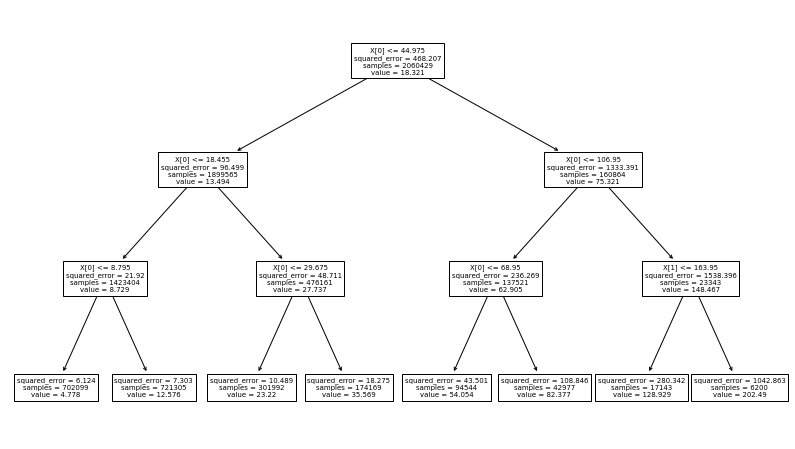

In [245]:
# Dùng DecisionTreeRegressor:
from sklearn.tree import DecisionTreeRegressor
X = df_numeric.loc[:,features_RFE].copy()
y = df_numeric['close'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = DecisionTreeRegressor(max_depth=3, random_state=5678)
model = regr.fit(X_train, y_train)
plt.figure(figsize=(14,8))
from sklearn import tree
_ = tree.plot_tree(regr.fit(X_train, y_train))

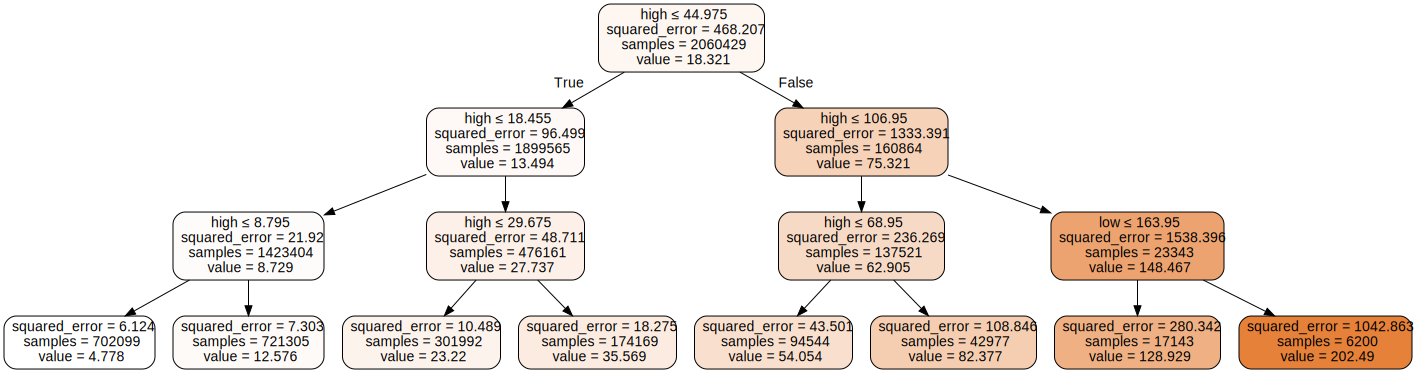

In [246]:
import graphviz 
import os
dot_data = tree.export_graphviz(regr, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph 

In [222]:
#---------------------------------------------------------

In [210]:
y_pre_train = regr.predict(X_train)
y_pre_train

array([ 5.70193786,  9.76697954, 11.91172182, ..., 27.81511099,
       11.91172182,  1.5630296 ])

In [223]:
X_train['predict'] = y_pre_train
X_train

,high,low,adHigh,adLow,adClose,predict
927531,6.30,6.30,6.300,6.300,6.300,5.701938
2038026,9.22,9.13,9.220,9.130,9.220,9.766980
2629522,11.50,11.40,10.564,10.472,10.518,11.911722
1343311,1.86,1.79,1.860,1.790,1.860,1.563030
2675776,9.00,8.80,8.806,8.610,8.610,9.766980
...,...,...,...,...,...,...
1692743,26.80,26.80,18.382,18.382,18.382,27.815111
2356330,6.60,6.60,5.890,5.890,5.890,5.701938
2229084,27.25,26.85,13.213,13.018,13.018,27.815111
2768307,12.40,12.40,11.172,11.172,11.172,11.911722


In [232]:
# tương tự với tập test
regr = DecisionTreeRegressor(max_depth=5, random_state=1234)
model = regr.fit(X_test, y_test)
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_0 <= 44.57
|   |--- feature_0 <= 18.37
|   |   |--- feature_0 <= 8.80
|   |   |   |--- feature_0 <= 4.77
|   |   |   |   |--- feature_4 <= 2.30
|   |   |   |   |   |--- value: [1.56]
|   |   |   |   |--- feature_4 >  2.30
|   |   |   |   |   |--- value: [3.70]
|   |   |   |--- feature_0 >  4.77
|   |   |   |   |--- feature_0 <= 6.79
|   |   |   |   |   |--- value: [5.70]
|   |   |   |   |--- feature_0 >  6.79
|   |   |   |   |   |--- value: [7.66]
|   |   |--- feature_0 >  8.80
|   |   |   |--- feature_0 <= 13.15
|   |   |   |   |--- feature_0 <= 10.97
|   |   |   |   |   |--- value: [9.77]
|   |   |   |   |--- feature_0 >  10.97
|   |   |   |   |   |--- value: [11.91]
|   |   |   |--- feature_0 >  13.15
|   |   |   |   |--- feature_0 <= 15.68
|   |   |   |   |   |--- value: [14.23]
|   |   |   |   |--- feature_0 >  15.68
|   |   |   |   |   |--- value: [16.80]
|   |--- feature_0 >  18.37
|   |   |--- feature_0 <= 29.57
|   |   |   |--- feature_0 <= 23.73
|   |   |   |   |